In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from itertools import chain
import numpy as np
import os
import scipy.io
import glob
from PIL import Image

In [162]:
# Cria uma lista com todos os nomes das imagens
filenames = [img for img in glob.glob("lfw*/*.jpg")]

# Cria uma lista vazia com a quantidade de imagens na pasta
# m = [[] for i in range(200)]

m = np.zeros((1000, 250*250))

# Transforma as imagens 64x64 em vetores de 4096 linhas e transforma em uma matriz numpy
for i in range(1000):
  m[i] = np.array(Image.open(filenames[i]).convert('L').getdata())


In [78]:
m.shape

(200, 62500)

In [164]:
training_faces = m[:950]
avg_faces = np.mean(training_faces, axis = 0)

X = training_faces - np.tile(avg_faces, (950, 1))
X = X.T
U, S, VT = np.linalg.svd(X, full_matrices = 0)


(-0.5, 249.5, 249.5, -0.5)

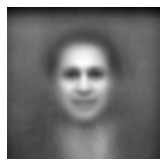

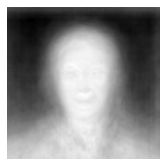

In [165]:
fig1 =  plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_faces, (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")

fig1 =  plt.figure()
ax1 = fig1.add_subplot(122)
img_avg = ax1.imshow(np.reshape(U[:, 0], (250, 250)))
img_avg.set_cmap("gray")
plt.axis("off")


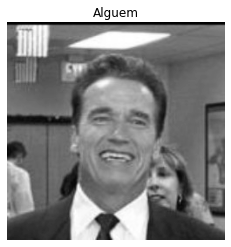

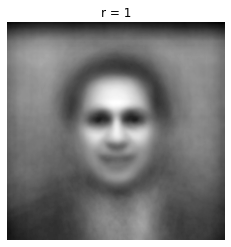

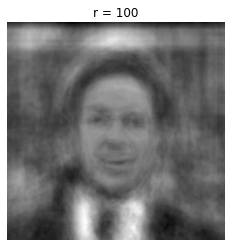

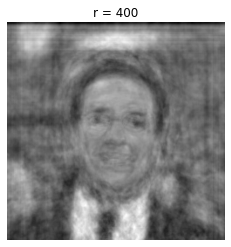

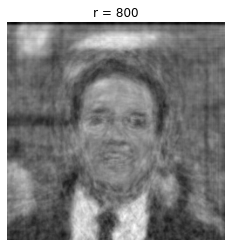

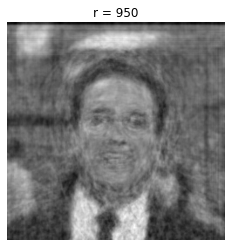

In [167]:
testface = m[951]
plt.imshow(np.reshape(testface, (250, 250)))
plt.set_cmap("gray")
plt.title("Alguem")
plt.axis("off")
plt.show()

testfaceMS = testface - avg_faces
testfaceMS = testfaceMS.T
r_list = [1, 100, 400, 800, 950]

for r in r_list:
    reconface = avg_faces.T + np.matmul(U[:,:r], np.matmul(U[:, :r].T, testfaceMS))
    img = plt.imshow(np.reshape(reconface, (250, 250)))
    img.set_cmap("gray")
    plt.title("r = " + str(r))
    plt.axis("off")
    plt.show()

